## 3.2 Sharpe: Compilation and Rebalancing Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from modules import performance_measures_helper as pms

In [2]:
daily_rets = (
    pd.read_csv("./data/config/20220814_daily_raw_returns_merged.csv", 
    header=0, na_values="#N/A", index_col="Date", parse_dates=True)
)

In [9]:
monthly_rets = daily_rets.resample("BM").apply(pms.net_cumreturn, last_row=True)

<AxesSubplot:xlabel='Date'>

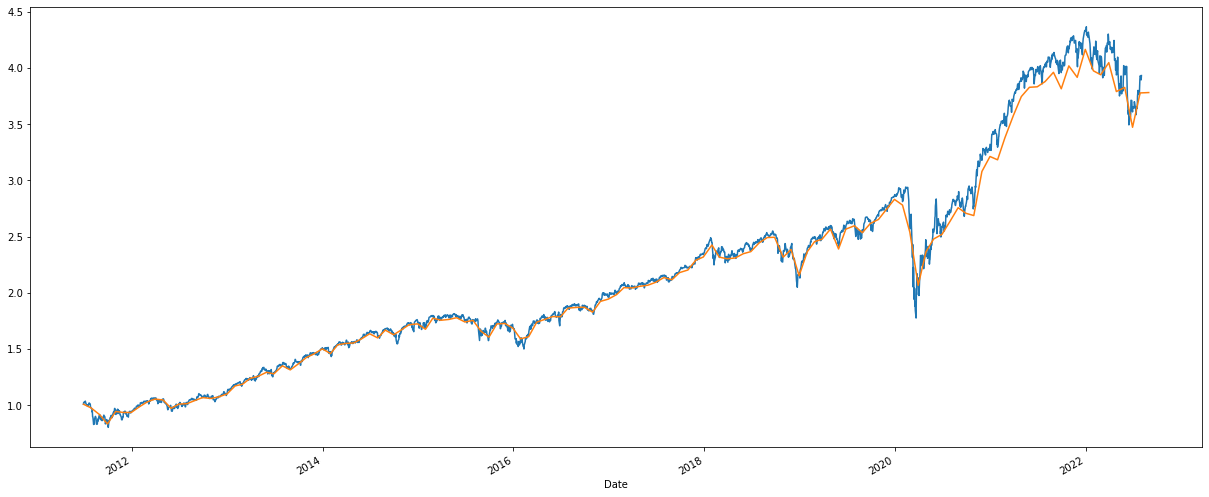

In [10]:
# Total Returns comparison
(1+daily_rets.mean(skipna=True, axis=1)).cumprod().plot(figsize=(21,9))
(1+monthly_rets.mean(skipna=True, axis=1)).cumprod().plot()

In [11]:
rolling_sharpe360D = daily_rets.rolling(window="360D", min_periods=240).apply(pms.sharpe_ratio)
rolling_sharpe180D = daily_rets.rolling(window="180D", min_periods=120).apply(pms.sharpe_ratio)
rolling_sharpe90D = daily_rets.rolling(window="90D", min_periods=60).apply(pms.sharpe_ratio)

In [12]:
rolling_sharpe360D_monthly = rolling_sharpe360D.resample("BM").apply(lambda x: x[-1])
rolling_sharpe180D_monthly = rolling_sharpe180D.resample("BM").apply(lambda x: x[-1])
rolling_sharpe90D_monthly = rolling_sharpe90D.resample("BM").apply(lambda x: x[-1])

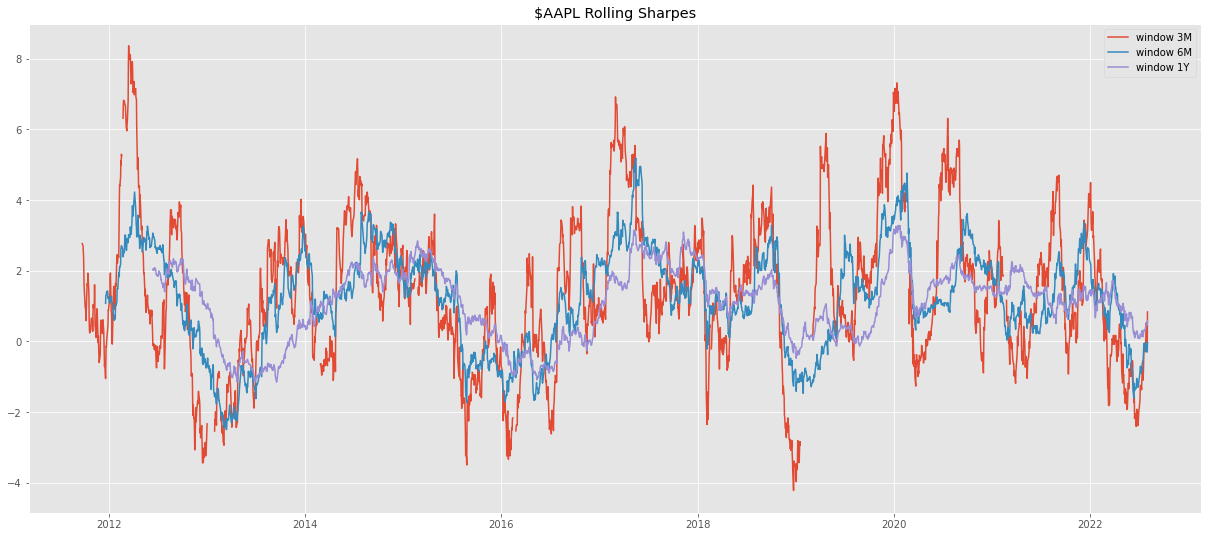

In [26]:
plt.style.use("ggplot")

fig, ax = plt.subplots(1,1,figsize=(21,9))
line90D, = ax.plot(rolling_sharpe90D[["AAPL"]])
line180D, = ax.plot(rolling_sharpe180D[["AAPL"]])
line360D, = ax.plot(rolling_sharpe360D[["AAPL"]])
ax.legend(handles=[line90D, line180D, line360D], labels=["window 3M","window 6M","window 1Y"])
ax.set_title("$AAPL Rolling Sharpes");

In [27]:
from importlib import reload
reload(pms)

<module 'modules.performance_measures_helper' from '/home/hcf/source/Python/pystock_recommender/jupyter_notebooks/modules/performance_measures_helper.py'>

In [33]:
daily_rets.rolling(window="360D", min_periods=240).apply(pms.israelsen_sharpe_ratio)

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,-0.000126,NaN,-0.000497,-0.000063,0.431691,1.524799,0.950033,-0.000025,-0.000046,NaN,...,-0.000709,NaN,-0.000347,NaN,-0.000031,-0.000370,-0.000594,0.348509,NaN,-0.000066
2022-07-29,-0.000105,NaN,-0.000492,-0.000061,0.496740,1.270513,0.925420,-0.000010,-0.000068,NaN,...,-0.000688,NaN,-0.000341,NaN,-0.000039,-0.000300,-0.000529,0.344367,NaN,-0.000075
2022-08-01,-0.000127,NaN,-0.000526,0.028431,0.500891,1.236026,1.054555,-0.000126,-0.000063,NaN,...,-0.000588,NaN,-0.000366,NaN,-0.000042,-0.000271,-0.000573,0.193451,NaN,-0.000081


In [34]:
rolling_israelsen360D = _

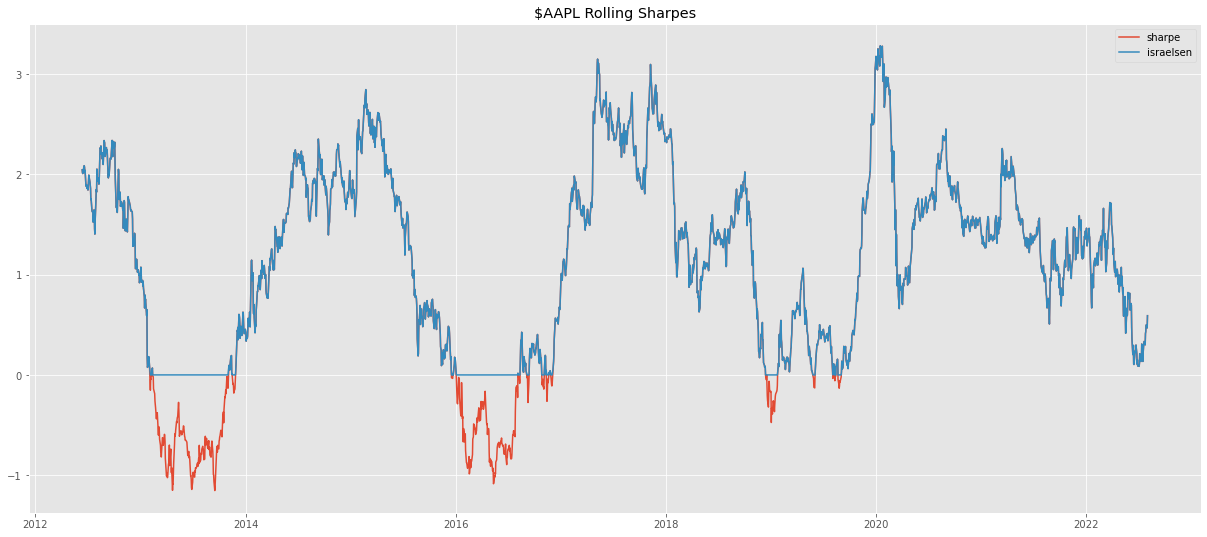

In [35]:
plt.style.use("ggplot")

fig, ax = plt.subplots(1,1,figsize=(21,9))
line_sharpe, = ax.plot(rolling_sharpe360D[["AAPL"]])
line_israelsen, = ax.plot(rolling_israelsen360D[["AAPL"]])
ax.legend(handles=[line_sharpe, line_israelsen], labels=["sharpe","israelsen"])
ax.set_title("$AAPL Rolling Sharpes");

In [36]:
rolling_israelsen180D = daily_rets.rolling(window="180D", min_periods=120).apply(pms.israelsen_sharpe_ratio)
rolling_israelsen90D = daily_rets.rolling(window="90D", min_periods=60).apply(pms.israelsen_sharpe_ratio)

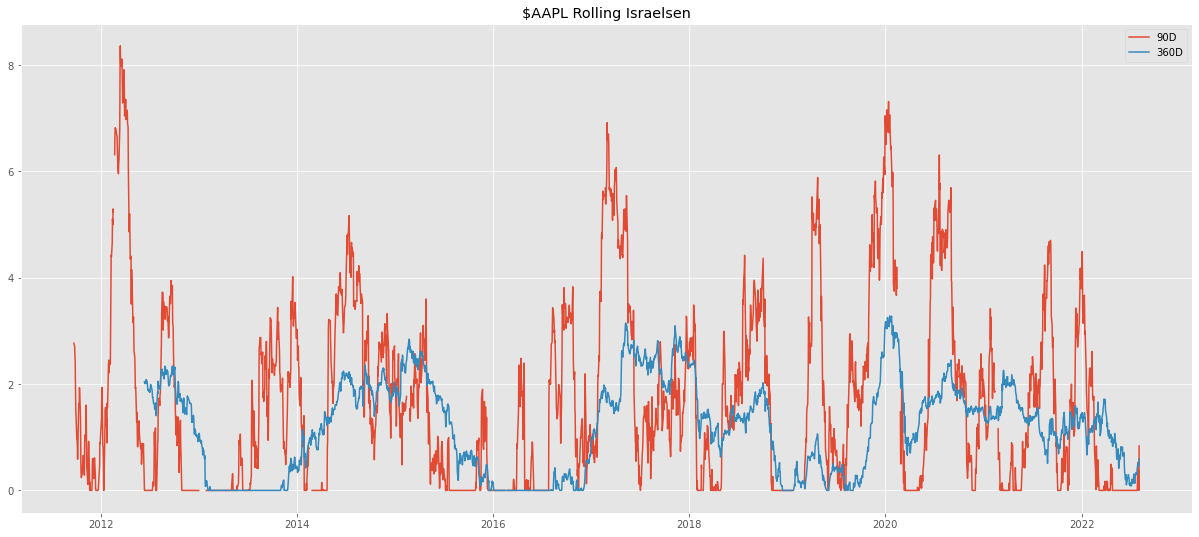

In [37]:
plt.style.use("ggplot")

fig, ax = plt.subplots(1,1,figsize=(21,9))
line_israelsen90, = ax.plot(rolling_israelsen90D[["AAPL"]])
line_israelsen360, = ax.plot(rolling_israelsen360D[["AAPL"]])
ax.legend(handles=[line_israelsen90, line_israelsen360], labels=["90D","360D"])
ax.set_title("$AAPL Rolling Israelsen");

In [38]:
rolling_israelsen360D_monthly = rolling_israelsen360D.resample("BM").apply(lambda x: x[-1])
rolling_israelsen180D_monthly = rolling_israelsen180D.resample("BM").apply(lambda x: x[-1])
rolling_israelsen90D_monthly = rolling_israelsen90D.resample("BM").apply(lambda x: x[-1])

### Serializing Sharpes for Future Use

In [39]:
rolling_sharpes = {"window_keys": ["90D", "180D", "360D"],
                    "sharpe_daily": (rolling_sharpe90D, rolling_sharpe180D, rolling_sharpe360D),
                    "sharpe_monthly": (rolling_sharpe90D_monthly, rolling_sharpe180D_monthly, rolling_sharpe360D_monthly),
                    "israelsen_daily": (rolling_israelsen90D, rolling_israelsen180D, rolling_israelsen360D),
                    "israelsen_monthly": (rolling_israelsen90D_monthly, rolling_israelsen180D_monthly, rolling_israelsen360D_monthly)}

In [41]:
rolling_sharpes["window_keys"]

['90D', '180D', '360D']

In [42]:
#Pickle serialization
with open("data/config/20220831_rolling_sharpes_data.pkl","wb") as file:
    pickle.dump(rolling_sharpes,file, protocol=pickle.HIGHEST_PROTOCOL)

### Updating Serialized Rolling Returns

In [43]:
with open("data/config/20220831_rolling_rets_data.pkl","rb") as file:
    rolling_rets = pickle.load(file)

In [44]:
rolling_rets.keys()

dict_keys(['daily', 'monthly'])

In [45]:
rolling_rets["window_keys"] = ["90D","180D","360D"]

In [46]:
rolling_rets.keys()

dict_keys(['daily', 'monthly', 'window_keys'])

In [47]:
with open("data/config/20220831_rolling_rets_data.pkl","wb") as f:
    pickle.dump(rolling_rets, f, protocol=pickle.HIGHEST_PROTOCOL)

In [56]:
%whos

Variable                        Type              Data/Info
-----------------------------------------------------------
ax                              AxesSubplot       AxesSubplot(0.125,0.125;0.775x0.755)
daily_rets                      DataFrame                            A     <...>[2796 rows x 755 columns]
f                               BufferedReader    <_io.BufferedReader name=<...>ice_components_data.pkl'>
fig                             Figure            Figure(1512x648)
file                            BufferedReader    <_io.BufferedReader name=<...>1_rolling_rets_data.pkl'>
line180D                        Line2D            Line2D(_child1)
line360D                        Line2D            Line2D(_child2)
line90D                         Line2D            Line2D(_child0)
line_israelsen                  Line2D            Line2D(_child1)
line_israelsen360               Line2D            Line2D(_child1)
line_israelsen90                Line2D            Line2D(_child0)
line_sharpe 

### Trading Rules With Monthly Rebalancing and Fast Rolling Sharpes

In [58]:
START_TRAINING_DATE_CUT="2012-06-29" # -> To include on constants.py || load_features_dataset.py
END_TRAINING_DATE_CUT="2022-07-29"

In [59]:
# 1. Rolling 180D: Rank + Scorer
rolling_israelsen180D_monthly = rolling_israelsen180D_monthly[START_TRAINING_DATE_CUT:END_TRAINING_DATE_CUT]
rolling_israelsen180D_monthly

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,0.933961,0.299706,NaN,NaN,2.646898,NaN,0.853165,NaN,2.597296,NaN,...,0.947757,0.136190,0.027769,NaN,0.944909,2.033550,NaN,1.172036,NaN,NaN
2012-07-31,-0.000255,-0.000432,NaN,NaN,2.220416,NaN,0.271112,NaN,3.557247,NaN,...,-0.000049,-0.000190,-0.000162,NaN,0.328208,-0.000041,NaN,0.474871,NaN,NaN
2012-08-31,-0.000330,-0.000346,NaN,NaN,1.537724,NaN,0.704139,NaN,2.390061,NaN,...,-0.000104,-0.000179,-0.000126,NaN,-0.000028,0.398635,NaN,0.290820,NaN,NaN
2012-09-28,-0.000289,-0.000208,NaN,NaN,0.915798,NaN,-0.000005,NaN,2.054399,NaN,...,-0.000061,-0.000170,-0.000142,NaN,-0.000092,0.642528,NaN,-0.000039,NaN,NaN
2012-10-31,-0.000250,-0.000136,NaN,NaN,0.590134,NaN,1.304572,NaN,0.878736,NaN,...,-0.000093,-0.000332,-0.000122,NaN,0.096558,0.323582,NaN,0.578870,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,-0.000321,NaN,-0.000426,0.183734,1.641526,4.920482,2.765592,0.334037,0.191004,NaN,...,-0.000354,NaN,-0.000810,NaN,-0.000029,-0.000239,-0.000523,0.405321,NaN,-0.000050
2022-04-29,-0.000622,NaN,0.205547,-0.000213,0.511182,2.683016,2.247812,-0.000345,-0.000207,NaN,...,-0.000867,NaN,-0.001159,NaN,-0.000082,-0.000289,-0.001021,-0.000186,NaN,-0.000374
2022-05-31,-0.000382,NaN,0.386576,-0.000413,-0.000179,2.525611,2.794423,-0.000433,-0.000138,NaN,...,-0.000533,NaN,-0.000962,NaN,-0.000032,0.203969,-0.001749,-0.000210,NaN,-0.000561


In [78]:
MAXCAT=20
mask180 = rolling_israelsen180D_monthly.rank(axis=1).apply(pms.scorer, bins=MAXCAT, axis=1).shift(1)==MAXCAT

In [66]:
monthly_rets = monthly_rets[START_TRAINING_DATE_CUT:END_TRAINING_DATE_CUT]
monthly_rets.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,-0.032358,0.028358,NaN,NaN,0.010853,NaN,0.070360,NaN,0.043373,NaN,...,0.023429,0.096238,-0.006317,NaN,-0.084423,0.064267,NaN,0.020494,NaN,NaN
2012-07-31,-0.024210,-0.036675,NaN,NaN,0.053258,NaN,0.002712,NaN,0.045348,NaN,...,-0.038879,-0.119441,-0.047278,NaN,0.011090,-0.084369,NaN,-0.062822,NaN,NaN
2012-08-31,-0.029511,0.014218,NaN,NaN,0.086153,NaN,-0.026355,NaN,-0.019893,NaN,...,-0.001926,0.063492,0.017033,NaN,-0.017274,0.048363,NaN,0.058235,NaN,NaN
2012-09-28,0.037403,0.040070,NaN,NaN,0.002796,NaN,0.011129,NaN,0.046079,NaN,...,0.053091,-0.009757,0.035405,NaN,0.041117,0.097453,NaN,0.073247,NaN,NaN
2012-10-31,-0.063979,-0.034052,NaN,NaN,-0.107600,NaN,0.012614,NaN,-0.037658,NaN,...,-0.034085,-0.112363,-0.031487,NaN,0.062217,-0.050429,NaN,0.039690,NaN,NaN


In [74]:
print(mask180.shape)
print(monthly_rets.shape)

(122, 755)
(122, 755)


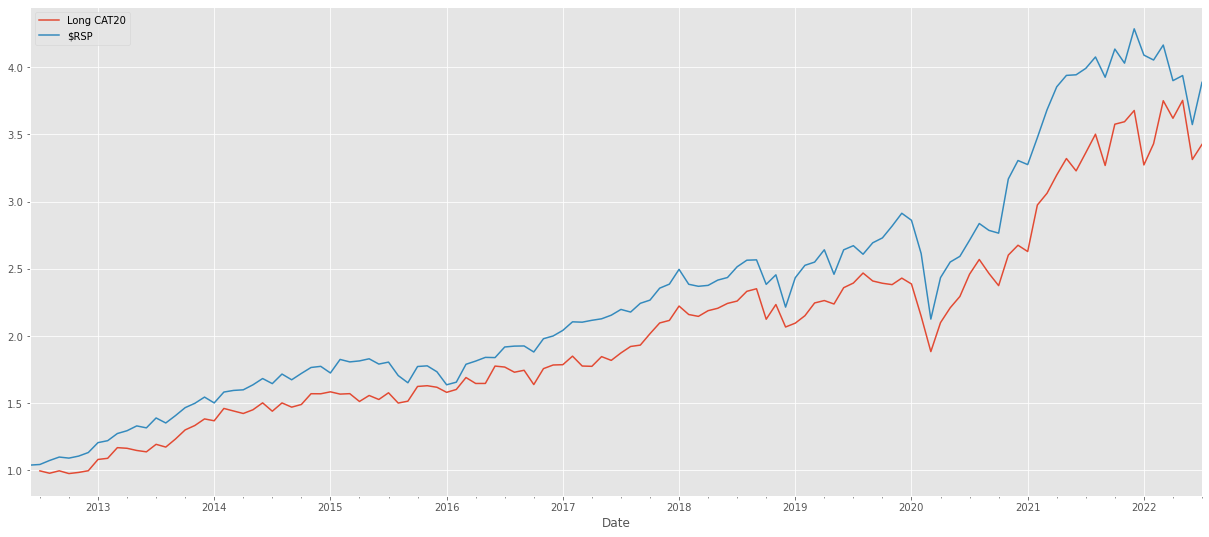

In [81]:
(1+monthly_rets[mask180].mean(skipna=True, axis=1)).cumprod().rename("Long CAT"+str(MAXCAT)).plot(figsize=(21,9), legend=True)
(1+monthly_rets.mean(skipna=True, axis=1)).cumprod().rename("$RSP").plot(legend=True);

Again: not conclusive, but seems to be a good candidate as a feature for explaining stocks relevance.

In [82]:
# 2. Rolling 90D
rolling_israelsen90D_monthly = rolling_israelsen90D_monthly[START_TRAINING_DATE_CUT:END_TRAINING_DATE_CUT]
rolling_israelsen90D_monthly

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,-0.000582,-0.000564,NaN,NaN,-0.000066,NaN,0.128935,NaN,1.803763,NaN,...,-0.000177,-0.000051,-0.000336,NaN,-0.000402,0.185430,NaN,-0.000439,NaN,NaN
2012-07-31,-0.000535,-0.000569,NaN,NaN,0.901217,NaN,1.700584,NaN,2.109051,NaN,...,-0.000367,-0.000529,-0.000558,NaN,-0.000552,-0.000262,NaN,-0.000634,NaN,NaN
2012-08-31,-0.000063,0.640931,NaN,NaN,3.458731,NaN,1.586826,NaN,2.965306,NaN,...,0.136488,0.682008,0.037572,NaN,-0.000015,1.023306,NaN,0.926071,NaN,NaN
2012-09-28,-0.000033,0.369378,NaN,NaN,2.607377,NaN,-0.000025,NaN,2.321365,NaN,...,0.305179,-0.000308,0.167182,NaN,0.754845,1.232128,NaN,1.178299,NaN,NaN
2012-10-31,-0.000160,0.885249,NaN,NaN,-0.000066,NaN,0.591668,NaN,-0.000030,NaN,...,0.921461,-0.000076,0.815995,NaN,1.351484,2.425228,NaN,3.248445,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,-0.000919,NaN,0.408651,-0.000699,-0.000022,5.057247,3.460079,-0.000396,-0.000669,NaN,...,-0.000573,NaN,-0.001967,NaN,-0.000608,0.662670,-0.002271,0.608805,NaN,-0.001150
2022-04-29,-0.000669,NaN,1.459491,-0.000702,-0.000313,1.279233,2.056309,0.510114,-0.000374,NaN,...,-0.001704,NaN,-0.001298,NaN,-0.000129,0.513790,-0.001758,-0.001112,NaN,-0.000372
2022-05-31,-0.000144,NaN,0.855506,-0.000448,-0.000600,-0.000066,1.369553,-0.001282,-0.000087,NaN,...,-0.001638,NaN,-0.000148,NaN,0.151468,-0.000035,-0.001296,-0.000995,NaN,-0.000622


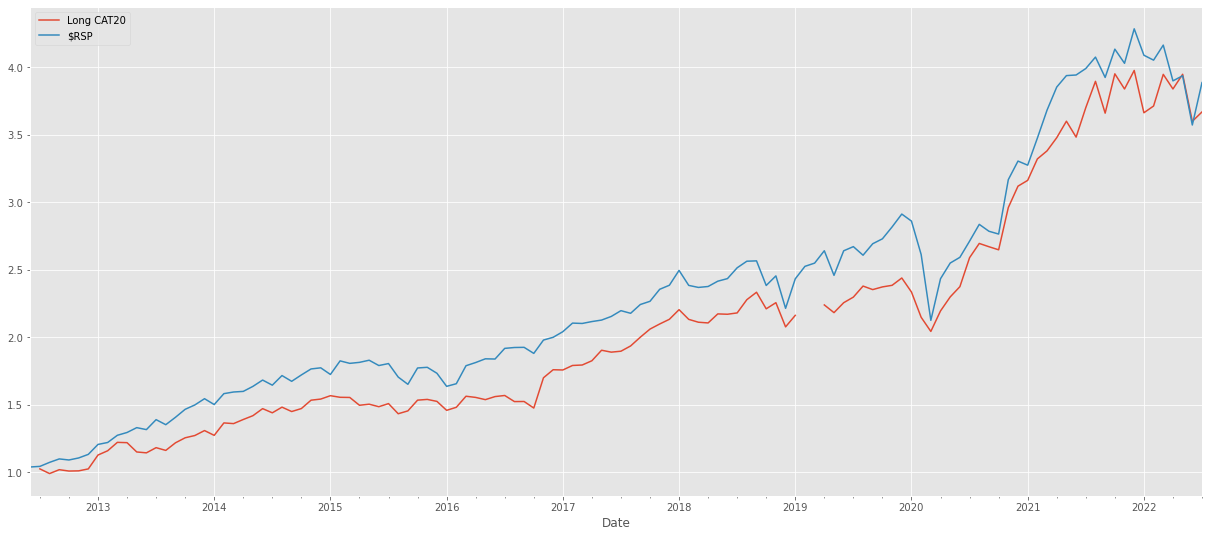

In [86]:
MAXCAT=20
mask90 = rolling_israelsen90D_monthly.rank(axis=1).apply(pms.scorer, bins=MAXCAT, axis=1).shift(1)==MAXCAT
(1+monthly_rets[mask90].mean(skipna=True, axis=1)).cumprod().rename("Long CAT"+str(MAXCAT)).plot(figsize=(21,9), legend=True)
(1+monthly_rets.mean(skipna=True, axis=1)).cumprod().rename("$RSP").plot(legend=True);